In [15]:
 # Import relevant libraries and packages.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
df = pd.read_csv('df_cleaned.csv', index_col = False)

In [17]:
df.columns

Index(['patient', 'Age', 'Sex', 'Chest_Pain_Type', 'Resting_BP', 'Cholesterol',
       'Fasting_BS', 'Resting_ECG', 'Max_HR', 'Exercise_Induced_Angina',
       'ST_Depression', 'ST_Slope', 'Num_Major_Vessels', 'Thal_Test',
       'Disease'],
      dtype='object')

In [18]:
# Encode categorical variables as dummy variables for training

categorical_features = ['Sex',
                        'Chest_Pain_Type',
                        'Resting_ECG',
                        'ST_Slope',
                        'Thal_Test',
                        'Num_Major_Vessels']
df = pd.get_dummies(df, columns = categorical_features)
print('The data have ', df.shape[0], ' rows and ', df.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(df.columns)))

df.to_csv('df_cleaned.csv', index= False)


The data have  290  rows and  28  columns

column names: 

patient
Age
Resting_BP
Cholesterol
Fasting_BS
Max_HR
Exercise_Induced_Angina
ST_Depression
Disease
Sex_0
Sex_1
Chest_Pain_Type_1
Chest_Pain_Type_2
Chest_Pain_Type_3
Chest_Pain_Type_4
Resting_ECG_0
Resting_ECG_1
Resting_ECG_2
ST_Slope_1
ST_Slope_2
ST_Slope_3
Thal_Test_3.0
Thal_Test_6.0
Thal_Test_7.0
Num_Major_Vessels_0.0
Num_Major_Vessels_1.0
Num_Major_Vessels_2.0
Num_Major_Vessels_3.0


In [19]:
continous_features = ["Age","Resting_BP","Cholesterol","Max_HR","ST_Depression"]
target_feature = ["Disease"]

#define features and target
X = df.drop(columns = ["Disease"], axis=1)
y = df["Disease"]


#Feature Scaling: Normalizing or standardizing features so that the model isn't biased or sensitive to the scale of measurements.
# instantiating the scaler
# use standard scaler because we have already removed the most
scaler = StandardScaler()

# scale continuous features
X[continous_features] = scaler.fit_transform(X[continous_features])
X.head()

,patient,Age,Resting_BP,Cholesterol,Fasting_BS,Max_HR,Exercise_Induced_Angina,ST_Depression,Sex_0,Sex_1,...,ST_Slope_1,ST_Slope_2,ST_Slope_3,Thal_Test_3.0,Thal_Test_6.0,Thal_Test_7.0,Num_Major_Vessels_0.0,Num_Major_Vessels_1.0,Num_Major_Vessels_2.0,Num_Major_Vessels_3.0
0,0,0.952446,0.807010,-0.246408,1,0.013627,0,1.100803,0,1,...,0,0,1,0,1,0,1,0,0,0
1,1,1.394558,1.687275,0.905446,0,-1.851280,1,0.404548,0,1,...,0,1,0,1,0,0,0,0,0,1
2,2,1.394558,-0.660097,-0.333341,0,-0.918827,1,1.361899,0,1,...,0,1,0,0,0,1,0,0,1,0
3,3,-1.921281,-0.073254,0.123054,0,1.656521,0,2.145185,0,1,...,0,0,1,1,0,0,1,0,0,0
4,4,-1.479169,-0.073254,-0.876668,0,0.990483,0,0.317516,1,0,...,1,0,0,1,0,0,1,0,0,0


In [41]:
# Perform the train/test split
# ensure the train/test sets have the same incidence of heart disease by stratifying y. 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, stratify = y, test_size = 0.4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(174, 27)
(116, 27)
(174,)
(116,)


In [47]:
#from logistic regression notebook
def plot_y_ratios(y, ytest):
    fig, ax = plt.subplots(2, sharex = True)
    ax[0].bar(x = [0, 1], height = [y[y == 0].count(), 
                                    y[y == 1].count()])
    ax[0].set_ylabel('train', fontsize = 8)
    ax[0].set_ylim(0, 125)
    ax[1].bar(x = [0, 1], height = [ytest[ytest == 0].count(),
                                    ytest[ytest == 1].count()])
    ax[1].set_ylabel('test', fontsize = 8)
    ax[1].set_ylim(0, 125)
    ax[1].set_xticks([0, 1])
    ax[0].tick_params(which = 'both', labelsize = 8)
    ax[1].tick_params(which = 'both', labelsize = 8)
    ax[1].set_xlabel('heart disease\n(0 = no disease)', fontsize = 8)
    ax[0].set_title('% heart disease (where 1 means presence of heart diseases):\n' +
                    'train: ' + str(round(100 * (y[y ==1].count()/y.shape[0]), 0)) +
                    '\ntest: ' + str(round(100 * (ytest[ytest ==1].count()/ytest.shape[0]), 0)),
                   fontsize = 10)
    plt.show() 

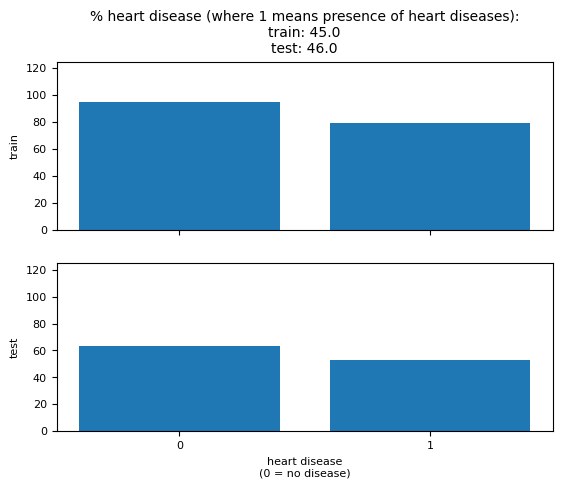

In [48]:
plot_y_ratios(y_train, y_test)

In [44]:
X_train.to_csv('X_train.csv', index = False)
y_train.to_csv('y_train.csv', index = False)
X_test.to_csv('X_test.csv', index = False)
y_test.to_csv('y_test.csv',index = False)